In [44]:
import numpy as np
import pandas as pd
from scipy import signal, ndimage, interpolate, stats
import sys, os, time, json
from pathlib import Path
import pickle as pkl

sys.path.append('../PreProcessing/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.text import Text

import TreeMazeFunctions as TMF
import spike_functions as SF
import spatial_tuning as ST
import plot_functions as PF
import TrialAnalyses as TA
import analyses_table as AT
import zone_analyses_session as ZA
from importlib import reload  # Python 3.4+ only.


In [41]:
oakPaths = AT.getOakPaths()
sns.set(style="whitegrid",font_scale=1,rc={
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor':'0.5'})

sns.set_context("poster")

plotSP = Path('/mnt/c/Users/alexg8/Documents/SfN2019/Plots/')


### Plot TreeMaze

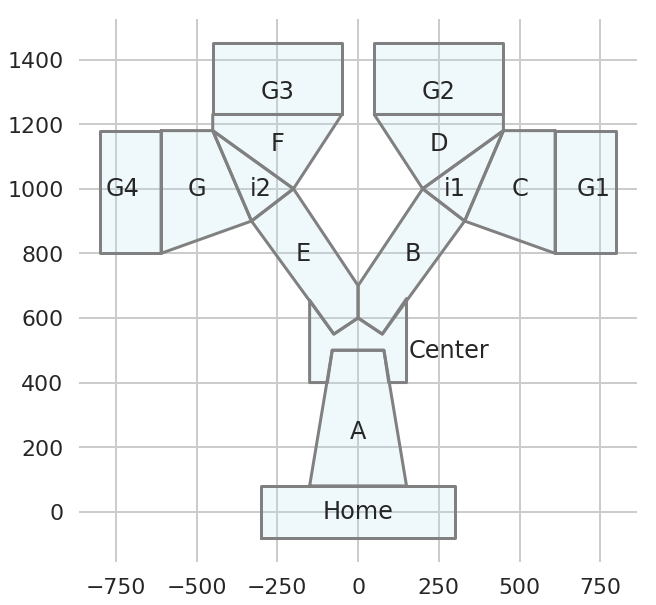

In [42]:
PF = reload(PF)
f,ax = plt.subplots(figsize=(10,10))
for zo in TMF.MazeZonesGeom.keys():
    PF.plotPoly(TMF.MazeZonesGeom[zo],ax,alpha=0.2,color='powderblue',lw=3)
ax.axis('equal')

ax.text(0,0,'Home',horizontalalignment='center',verticalalignment='center')
ax.text(0,250,'A',horizontalalignment='center',verticalalignment='center')
ax.text(155,500,'Center',horizontalalignment='left',verticalalignment='center')

ax.text(170,800,'B',horizontalalignment='center',verticalalignment='center')
ax.text(-170,800,'E',horizontalalignment='center',verticalalignment='center')

ax.text(300,1000,'i1',horizontalalignment='center',verticalalignment='center')
ax.text(-300,1000,'i2',horizontalalignment='center',verticalalignment='center')

ax.text(500,1000,'C',horizontalalignment='center',verticalalignment='center')
ax.text(-500,1000,'G',horizontalalignment='center',verticalalignment='center')

ax.text(730,1000,'G1',horizontalalignment='center',verticalalignment='center')
ax.text(-730,1000,'G4',horizontalalignment='center',verticalalignment='center')

ax.text(250,1140,'D',horizontalalignment='center',verticalalignment='center')
ax.text(-250,1140,'F',horizontalalignment='center',verticalalignment='center')

ax.text(250,1300,'G2',horizontalalignment='center',verticalalignment='center')
ax.text(-250,1300,'G3',horizontalalignment='center',verticalalignment='center')

f.savefig(plotSP / 'MazeSegmentation.svg', bbox_inches='tight', pad_inches=0.2)

In [56]:
se = 'Li_T3g_062718'
an = 'Li'
fn = oakPaths['Root'] / (an+'_SessionPaths.pkl')
with fn.open(mode="rb") as f:
    sePaths = pkl.load(f)
PosDat = TMF.getBehTrackData(sePaths[se])
TrialDat = TA.main(sePaths[se])

Loading Beh Tracking Data
Complete.

Analyzing Trials from session Li_T3g_062718
Loading FRs ...
FR Loaded.
Loading Beh Tracking Data
Complete.
Trial Info Dict exists. Loading.
Process Completed. Time 0.22388267517089844s
Trial x Condition Matrix Exists. Loading.
Process Completed. Time 0.10750484466552734s
Trial x Position Long Condition Matrix Exists. Loading.
Process Completed. Time 0.18018651008605957s
Trial x Position Long FiringRate Matrix Exists. Loading.
Process Completed Time 0.20810317993164062s
Trial Model Fits Exists. Loading
Process Completed. Time 0.08019256591796875s


In [72]:
TrialDat[1][TrialDat[1]['Good']]

,Unnamed: 0,Cues,Desc,Co,Traj,OTraj,Dur,Good,Length,OLength
0,1,R,R,Co,R_S1,R_L1,632,True,S,L
2,3,L,R,InCo,R_L1,R_S1,1567,True,L,S
3,4,L,L,Co,L_L4,L_S4,1234,True,L,S
4,5,L,R,InCo,R_L1,NaN,630,True,L,NaN
5,6,R,R,Co,R_S2,R_S2,520,True,S,S
6,7,R,L,InCo,L_S3,NaN,400,True,S,NaN
7,8,L,R,InCo,R_L1,NaN,655,True,L,NaN
8,9,R,L,InCo,L_S3,NaN,568,True,S,NaN
9,10,L,L,Co,L_L4,L_S4,571,True,L,S
10,11,L,L,Co,L_L4,NaN,478,True,L,NaN


In [69]:
TrialDat[0].keys()

dict_keys(['All', 'L', 'R', 'BadTr', 'Cues', 'Desc', 'DurThr', 'TrDurs', 'TrialVec', 'TrStSamp', 'TrEnSamp', 'TrSeq', 'OffTrStSamp', 'OffTrEnSamp', 'OffTrDurs', 'OffTrialVec', 'OffTrSeq', 'ValidSeqTrials', 'ValidSeqOffTrials', 'ValidSeqTrID', 'ValidSeqOffTrID', 'ValidSeqNames', 'ValidSeqOffNames'])

In [74]:
TrialDat[0]['TrStSamp'][16]

18446

In [98]:
trial = 17
SampStart = TrialDat[0]['TrStSamp'][trial-1]
Dur = 30*50 # 20 seconds in samples
samps = np.arange(SampStart,SampStart+Dur)
t = PosDat['t'][samps]
z = PosDat['PosZones'][samps]
znames = list(TMF.Zones.values())


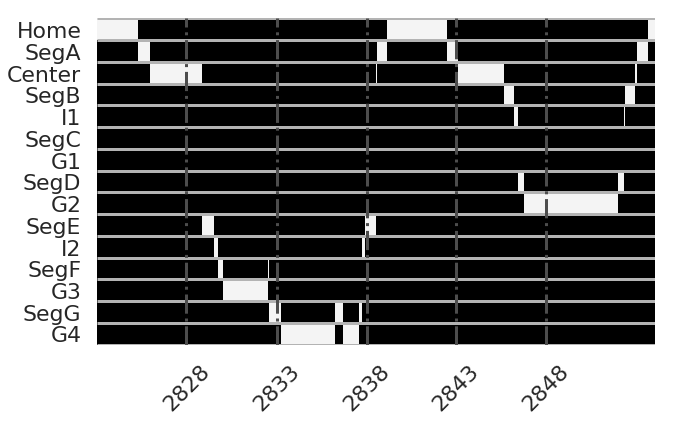

In [104]:
f,ax=plt.subplots(figsize=(10,6))
PF.plotBehWindow(t,PosDat['PosMat'].loc[samps].T,znames,ax)
f.savefig(plotSP / 'ExampleSegmentationDat.png', bbox_inches='tight', pad_inches=0.2)

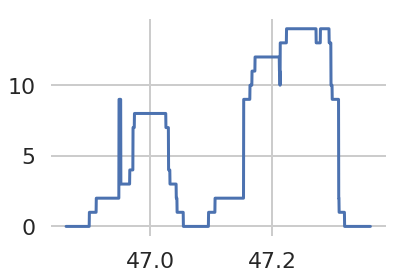

In [81]:
plt.plot(t/60,z)